In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#import csv file
df = pd.read_csv('bottle.csv')


In [4]:
df.head()

,Temp,Sal
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


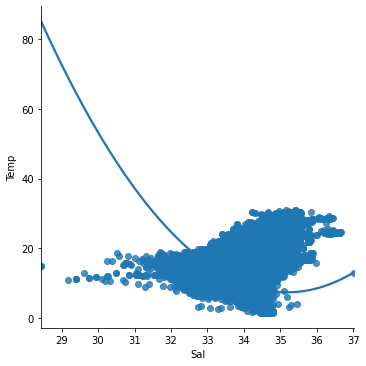

In [5]:
#Plotting the data scatter
sns.lmplot(x ="Sal", y ="Temp", data = df, order = 2, ci = None)

# Missing data

In [6]:
#easy way to see if there are any missing values (nan)
df.isnull().sum()

Temp    10963
Sal     47354
dtype: int64

<AxesSubplot:>

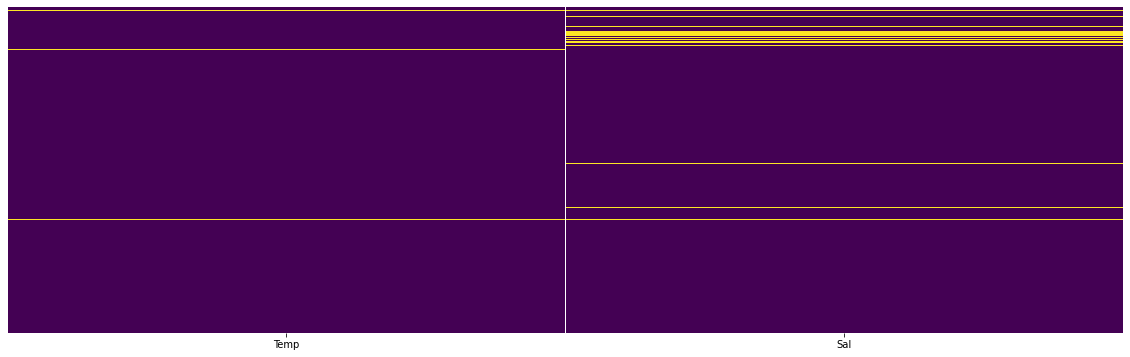

In [7]:
#to visually see the missing cells -- I kind-a love this!
plt.figure(figsize=(20, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
# Deleting NaN or missing 
df.fillna(method ='ffill', inplace = True)

print(df.shape)

(864863, 2)


In [10]:
df.isnull().sum()

Temp    0
Sal     0
dtype: int64

# Training the model

In [11]:
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
X = np.array(df['Sal']).reshape(-1, 1)
y = np.array(df['Temp']).reshape(-1, 1)
  
# Dropping any rows with Nan values
#df.dropna(inplace = True)
  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.20503123018376357


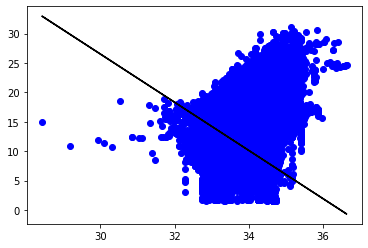

In [12]:
#Plotting the results
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [13]:
# Results show this data is not good for linear regression

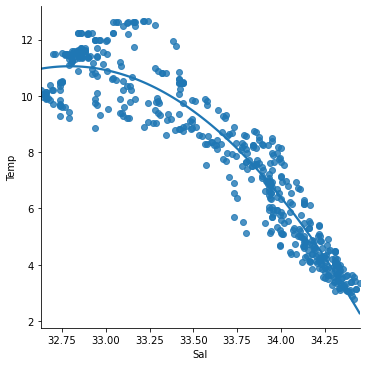

In [14]:
#looking at a smaller subset of the data
df_500 = df[:][:500]
  
# Selecting the 1st 500 rows of the data
sns.lmplot(x ="Sal", y ="Temp", data = df_500,
                               order = 2, ci = None)

In [15]:

df_500.fillna(method ='ffill', inplace = True)
  
X = np.array(df_500['Sal']).reshape(-1, 1)
y = np.array(df_500['Temp']).reshape(-1, 1)
  
df_500.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.8627765525958189


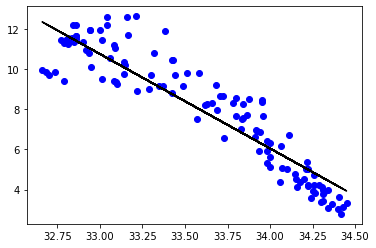

In [16]:

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [17]:
#This subsample is better for linear regression
# where the independent variable, X, or Sal
# predicts the dependent variable, y, or Temp